##Questions

The approach to grid sampling is the main difference between Convolutional Neural Networks and Deformable Convolutional Networks.

**1)** Key differences in grid sampling between CNNs and Deformable CNNs:

1. **Regular Grids vs. Deformable Grids:**
   - In CNNs, convolutional operations are performed using regular grids with fixed spacing. These grids cover the input image in a systematic and rigid manner.
   - In DCNs, the grids are deformable, meaning that their positions and shapes can be adjusted dynamically based on the content of the input data. This allows the network to focus on more informative regions of the input.

2. **Spatial Adaptability:**
   - CNNs have limited spatial adaptability since their convolutional filters follow a fixed pattern across the input image.
   - DCNs offer higher spatial adaptability as the deformable grids allow the network to selectively attend to specific regions of interest, providing better alignment with the features in the input.

3. **Handling Object Deformations:**
   - CNNs may struggle to handle variations and deformations in objects within the input image because of their fixed grids.
   - DCNs are designed to handle deformations more effectively. The deformable grids enable the network to better capture the spatial transformations of objects, improving the model's ability to recognize deformed or distorted patterns.

4. **Reduced Localization Errors:**
   - CNNs may suffer from localization errors when trying to precisely align convolutional filters with features in the input image.
   - DCNs aim to reduce localization errors by allowing flexible adjustments of the grids, ensuring better alignment and localization of features.


**2)** DCNs introduce flexibility in handling geometric transformations. Explanation :

- **Deformable Convolutional Filters:**
In DCNs, the convolutional filters are deformable, meaning that they can adapt their shapes and positions according to the features present in the input. This flexibility allows the network to focus on more informative regions of the input, particularly those undergoing geometric transformations.

- **Learnable Offset Parameters:**
DCNs incorporate learnable offset parameters associated with each sampling point in the convolutional grid. These parameters are adjusted during the training process based on the data, allowing the network to learn how to deform the grids effectively.

- **Adaptive Sampling:**
The deformable grids enable adaptive sampling, where the network can selectively attend to specific regions of interest within an object or scene. This is particularly beneficial when dealing with objects undergoing deformations or transformations.

- **Improved Feature Alignment:**
Traditional CNNs with fixed grids may struggle to precisely align convolutional filters with features in the presence of geometric transformations. DCNs, with their deformable convolutional layers, provide improved feature alignment by dynamically adjusting to the spatial variations in the input.

- **Reduced Sensitivity to Object Deformations:**
DCNs are less sensitive to object deformations because the deformable grids allow the network to model and capture the spatial transformations more effectively. This can lead to better performance in tasks where objects may undergo various deformations.

**4)** Convolutional Neural Networks may face significant challenges when dealing with images containing objects that undergo substantial spatial changes or rotations. The primary reasons for these challenges include:

- **Fixed Convolutional Grids:**
Standard convolutional layers use fixed and regular grids for feature extraction. These fixed grids may not be able to adequately capture the spatial transformations present in images with objects undergoing significant changes or rotations.

- **Limited Spatial Invariance:**
CNNs are designed to be spatially invariant, meaning they should be able to recognize patterns regardless of their location in the input image. However, when objects undergo substantial spatial changes, the fixed convolutional grids may struggle to maintain this invariance, leading to decreased performance.

- **Lack of Adaptability to Deformations:**
Simple convolutional layers lack the adaptability needed to handle deformations in objects. When objects experience significant changes or rotations, the fixed convolutional grids may not align well with the transformed features, resulting in reduced feature extraction accuracy.

- **Pooling Aggravating the Issue:**
Pooling operations in traditional CNNs, such as max pooling, can exacerbate the problem. These operations downsample features and may discard important spatial information, making it more challenging for the network to recover from significant spatial transformations.

- **Difficulty in Learning Spatial Transformations:**
CNNs with fixed convolutional grids may find it difficult to learn and adapt to spatial transformations during the training process. The rigid structure limits the network's ability to generalize well to variations in object poses or spatial configurations.

- **Increased Sensitivity to Rotation:**
Rotational invariance is crucial in many image recognition tasks. CNNs with fixed grids might be sensitive to variations in object orientation, leading to decreased performance when objects are rotated.

**5)** The offsets Calculation :

-  **Learnable Offset Parameters:**
For each sampling point in the regular grid, there are associated learnable offset parameters. These offset parameters are treated as additional weights in the network and are optimized during the training process.

-  **Offset Prediction:**
The network predicts the offsets for each sampling point in the grid during the forward pass. This prediction is typically performed using a separate convolutional layer or a fully connected layer that takes the features from the previous layer as input.

- **Grid Adjustment:**
The predicted offsets are then used to adjust the positions of the sampling points in the regular grid. The adjustment is typically performed using bilinear interpolation, where the offset values determine the weights for interpolating the neighboring pixel values.

##COCO Dataset

**Dataset download**

In [1]:
!wget http://images.cocodataset.org/zips/train2017.zip -O coco_train2017.zip
!wget http://images.cocodataset.org/zips/val2017.zip -O coco_val2017.zip
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip -O coco_ann2017.zip

--2023-12-22 19:33:16--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.25.119, 52.216.51.81, 54.231.228.105, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.25.119|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘coco_train2017.zip’

coco_train2017.zip  100%[===================>]  18.01G  47.5MB/s    in 6m 36s  

2023-12-22 19:39:52 (46.5 MB/s) - ‘coco_train2017.zip’ saved [19336861798/19336861798]

--2023-12-22 19:39:52--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 16.182.36.225, 52.217.136.89, 3.5.21.183, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|16.182.36.225|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘coco_val2017.zip’

coco_val2017.zip    100%[================

**Libraries**

In [2]:
from zipfile import ZipFile, BadZipFile
import os
from collections import defaultdict
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

**Dataset files extraction**

In [3]:
def extract_zip_file(extract_path):
    try:
        with ZipFile(extract_path+".zip") as zfile:
            zfile.extractall(extract_path)
        # remove zipfile
        zfileTOremove=f"{extract_path}"+".zip"
        if os.path.isfile(zfileTOremove):
            os.remove(zfileTOremove)
        else:
            print("Error: %s file not found" % zfileTOremove)
    except BadZipFile as e:
        print("Error:", e)
extract_train_path = "/content/coco_train2017"
extract_val_path = "/content/coco_val2017"
extract_ann_path="/content/coco_ann2017"
extract_zip_file(extract_train_path)
extract_zip_file(extract_val_path)
extract_zip_file(extract_ann_path)

**Dataset class**

In [4]:
class COCOParser:
    def __init__(self, anns_file, imgs_dir):
        with open(anns_file, 'r') as f:
            coco = json.load(f)

        self.annIm_dict = defaultdict(list)
        self.cat_dict = {}
        self.annId_dict = {}
        self.im_dict = {}
        self.licenses_dict = {}
        for ann in coco['annotations']:
            self.annIm_dict[ann['image_id']].append(ann)
            self.annId_dict[ann['id']]=ann
        for img in coco['images']:
            self.im_dict[img['id']] = img
        for cat in coco['categories']:
            self.cat_dict[cat['id']] = cat
        for license in coco['licenses']:
            self.licenses_dict[license['id']] = license
    def get_imgIds(self):
        return list(self.im_dict.keys())
    def get_annIds(self, im_ids):
        im_ids=im_ids if isinstance(im_ids, list) else [im_ids]
        return [ann['id'] for im_id in im_ids for ann in self.annIm_dict[im_id]]
    def load_anns(self, ann_ids):
        im_ids=ann_ids if isinstance(ann_ids, list) else [ann_ids]
        return [self.annId_dict[ann_id] for ann_id in ann_ids]
    def load_cats(self, class_ids):
        class_ids=class_ids if isinstance(class_ids, list) else [class_ids]
        return [self.cat_dict[class_id] for class_id in class_ids]
    def get_imgLicenses(self,im_ids):
        im_ids=im_ids if isinstance(im_ids, list) else [im_ids]
        lic_ids = [self.im_dict[im_id]["license"] for im_id in im_ids]
        return [self.licenses_dict[lic_id] for lic_id in lic_ids]

**Visualizing the dataset**

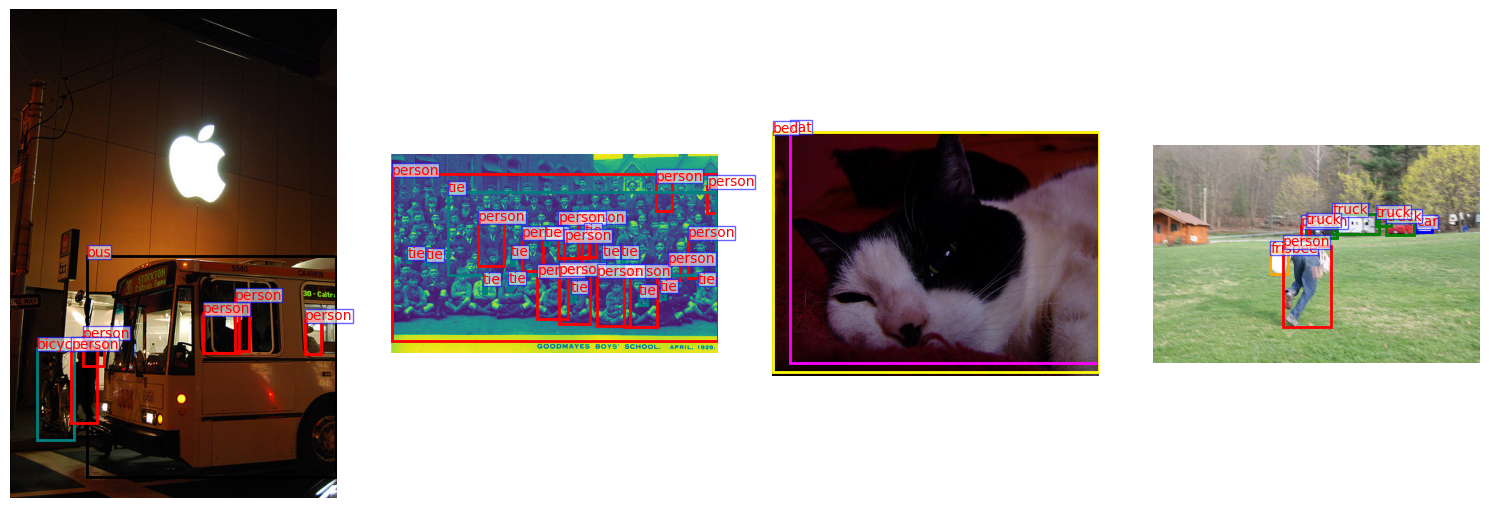

In [5]:
coco_annotations_file="/content/coco_ann2017/annotations/instances_val2017.json"
coco_images_dir="/content/coco_val2017/val2017"
coco= COCOParser(coco_annotations_file, coco_images_dir)

# define a list of colors for drawing bounding boxes
color_list = ["pink", "red", "teal", "blue", "orange", "yellow", "black", "magenta","green","aqua"]*10
num_imgs_to_disp = 4
total_images = len(coco.get_imgIds()) # total number of images
sel_im_idxs = np.random.permutation(total_images)[:num_imgs_to_disp] # randomly selecting pictures to display
img_ids = coco.get_imgIds()
selected_img_ids = [img_ids[i] for i in sel_im_idxs]
ann_ids = coco.get_annIds(selected_img_ids)
im_licenses = coco.get_imgLicenses(selected_img_ids)
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,10))
ax = ax.ravel()
for i, im in enumerate(selected_img_ids):
    image = Image.open(f"{coco_images_dir}/{str(im).zfill(12)}.jpg")
    ann_ids = coco.get_annIds(im)
    annotations = coco.load_anns(ann_ids)
    for ann in annotations:
        bbox = ann['bbox']
        x, y, w, h = [int(b) for b in bbox]
        class_id = ann["category_id"]
        class_name = coco.load_cats(class_id)[0]["name"]
        # license = coco.get_imgLicenses(im)[0]["name"]
        color_ = color_list[class_id]
        rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor=color_, facecolor='none')
        t_box=ax[i].text(x, y, class_name,  color='red', fontsize=10)
        t_box.set_bbox(dict(boxstyle='square, pad=0',facecolor='white', alpha=0.6, edgecolor='blue'))
        ax[i].add_patch(rect)

    ax[i].axis('off')
    ax[i].imshow(image)
    ax[i].set_xlabel('Longitude')
    # ax[i].set_title(f"License: {license}")
plt.tight_layout()
plt.show()

## Model

In [6]:
import torch
import numpy as np
import random
import torchvision.ops
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import argparse
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
import time

In [7]:
def setup_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    np.random.seed(seed)
    random.seed(seed)

In [8]:
class CustomCOCODataset(Dataset):
    def __init__(self, root, cocoparser, transform=None):
        self.cocoparser = cocoparser
        self.transform = transform
        self.img_ids = cocoparser.get_imgIds()
        self.img_ids = self.img_ids[0:min(len(self.img_ids), 10000)]
        self.root = root
        self.labels = self.generate_labels()

    def __len__(self):
        return len(self.img_ids)

    def __getitem__(self, idx):
        img_id = self.img_ids[idx]
        img_info = self.cocoparser.im_dict[img_id]
        # coco_images_dir = "/content/coco_val2017/val2017"
        img = Image.open(f"{self.root}/{img_info['file_name']}")

        label = self.labels[idx]

        if self.transform:
            img = self.transform(img)

        return img, torch.from_numpy(label).float()

    def generate_labels(self):
        labels = []
        for img_id in self.img_ids:
            label = np.zeros(91)
            ann_ids = self.cocoparser.get_annIds(img_id)
            annotations = self.cocoparser.load_anns(ann_ids)
            for ann in annotations:
                class_id = ann["category_id"]
                label[class_id] = 1
            labels.append(label)
        return np.array(labels)

In [9]:
class DeformableConv2d(nn.Module):
    def __init__(self,
                 in_channels,
                 out_channels,
                 kernel_size=3,
                 stride=1,
                 padding=1,
                 bias=False):

        super(DeformableConv2d, self).__init__()

        self.padding = padding

        self.offset_conv = nn.Conv2d(in_channels,
                                     2 * kernel_size * kernel_size,
                                     kernel_size=kernel_size,
                                     stride=stride,
                                     padding=self.padding,
                                     bias=True)

        nn.init.constant_(self.offset_conv.weight, 0.)
        nn.init.constant_(self.offset_conv.bias, 0.)

        self.modulator_conv = nn.Conv2d(in_channels,
                                     1 * kernel_size * kernel_size,
                                     kernel_size=kernel_size,
                                     stride=stride,
                                     padding=self.padding,
                                     bias=True)

        nn.init.constant_(self.modulator_conv.weight, 0.)
        nn.init.constant_(self.modulator_conv.bias, 0.)

        self.regular_conv = nn.Conv2d(in_channels=in_channels,
                                      out_channels=out_channels,
                                      kernel_size=kernel_size,
                                      stride=stride,
                                      padding=self.padding,
                                      bias=bias)

    def forward(self, x):
        h, w = x.shape[2:]
        max_offset = max(h, w)/4.

        offset = self.offset_conv(x).clamp(-max_offset, max_offset)
        modulator = 2. * torch.sigmoid(self.modulator_conv(x))

        x = torchvision.ops.deform_conv2d(input=x,
                                          offset=offset,
                                          weight=self.regular_conv.weight,
                                          bias=self.regular_conv.bias,
                                          padding=self.padding,
                                          mask=modulator
                                          )
        return x

In [10]:
class Classifier(nn.Module):
    def __init__(self, deformable=False):

        super(Classifier, self).__init__()

        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1, bias=True)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1, bias=True)
        self.conv3 = nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1, bias=True)
        conv = nn.Conv2d if deformable==False else DeformableConv2d
        self.conv4 = conv(32, 32, kernel_size=3, stride=1, padding=1, bias=True)
        self.conv5 = conv(32, 32, kernel_size=3, stride=1, padding=1, bias=True)

        self.pool = nn.MaxPool2d(2)
        self.gap = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(32, 91)
        self.sig = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(x) # [14, 14]
        x = torch.relu(self.conv2(x))
        x = self.pool(x) # [7, 7]
        x = torch.relu(self.conv3(x))
        x = torch.relu(self.conv4(x))
        x = torch.relu(self.conv5(x))
        x = self.gap(x)
        x = x.flatten(start_dim=1)
        x = self.fc(x)
        x = self.sig(x)
        return x


def train(model, loss_function, device, train_loader, optimizer, epoch):
    model.train()
    train_loss = 0
    correct = 0
    num_data = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_function(output, target)
        train_loss += loss
        loss.backward()
        optimizer.step()

        pred = (output >= 0.5).int()
        correct += (pred == target).sum().item()
        num_data += len(data) * target.shape[1]

    accuracy = 100. * (correct / num_data)
    train_loss /= len(train_loader)

    print(f"Train set: Loss: {train_loss:.4f}, Accuracy {accuracy}")


def test(model, loss_function, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    num_data = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)

            output = model(data)
            # sum up batch mean loss
            test_loss += loss_function(output, target).item()
            pred = (output >= 0.5).int()
            correct += (pred == target).sum().item()
            num_data += len(data) * target.shape[1]

    test_acc = 100. * (correct / num_data)
    test_loss /= len(test_loader)

    print(f"Test set: Loss: {test_loss:.4f}, Accuracy {test_acc}")
    return test_acc

In [11]:
def main(use_deformable_conv=False, epochs=10):

    setup_seed(1)
    batch_size = 64
    lr=1e-3
    gamma=0.7

    device = torch.device("cuda")

    train_kwargs = {'batch_size': batch_size}
    test_kwargs = {'batch_size': batch_size}
    cuda_kwargs = {'num_workers': 4, 'pin_memory': True, 'shuffle': True}
    train_kwargs.update(cuda_kwargs)
    test_kwargs.update(cuda_kwargs)

    transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    transforms.Grayscale(num_output_channels=1)
])

    coco_annotations_file="/content/coco_ann2017/annotations/instances_train2017.json"
    root="/content/coco_train2017/train2017"
    coco= COCOParser(coco_annotations_file, root)

    custom_dataset_train = CustomCOCODataset(root, coco, transform=transform)

    coco_annotations_file="/content/coco_ann2017/annotations/instances_val2017.json"
    root="/content/coco_val2017/val2017"
    coco= COCOParser(coco_annotations_file, root)

    custom_dataset_test = CustomCOCODataset(root, coco, transform=transform)

    # Define any additional parameters for DataLoader
    train_kwargs = {'batch_size': 64, 'shuffle': True, 'num_workers': 4}
    test_kwargs = {'batch_size': 64, 'shuffle': False, 'num_workers': 4}

    # Create DataLoader instances for dataset
    train_loader = DataLoader(custom_dataset_train, **train_kwargs)
    test_loader = DataLoader(custom_dataset_test, **test_kwargs)

    model = Classifier(use_deformable_conv).to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)

    scheduler = StepLR(optimizer, step_size=1, gamma=gamma)
    loss_function = nn.BCELoss()
    best_test_acc = 0.

    for epoch in range(1, epochs + 1):
        print(f"epoch {epoch}/{epochs}")
        train(model, loss_function, device, train_loader, optimizer, epoch)
        best_test_acc = max(best_test_acc, test(model, loss_function, device, test_loader))
        scheduler.step()


    print("best top1 acc(%): ", f"{best_test_acc:.2f}")

# Results comparison

In [16]:
start_time = time.time()
main(use_deformable_conv=False, epochs=10)
end_time = time.time()
runtime = end_time - start_time
# Print the runtime
minutes, seconds = divmod(runtime, 60)
print(f"Runtime with convolution: {int(minutes)} minutes and {round(seconds, 2)} seconds")

epoch 1/10
Train set: Loss: 0.1989, Accuracy 91.97065934065934
Test set: Loss: 0.1209, Accuracy 96.86923076923077
epoch 2/10
Train set: Loss: 0.1187, Accuracy 96.91615384615385
Test set: Loss: 0.1209, Accuracy 96.86923076923077
epoch 3/10
Train set: Loss: 0.1183, Accuracy 96.91087912087912
Test set: Loss: 0.1204, Accuracy 96.7843956043956
epoch 4/10
Train set: Loss: 0.1181, Accuracy 96.92164835164834
Test set: Loss: 0.1202, Accuracy 96.78615384615384
epoch 5/10
Train set: Loss: 0.1180, Accuracy 96.92285714285714
Test set: Loss: 0.1205, Accuracy 96.86923076923077
epoch 6/10
Train set: Loss: 0.1180, Accuracy 96.92021978021978
Test set: Loss: 0.1199, Accuracy 96.86703296703297
epoch 7/10
Train set: Loss: 0.1178, Accuracy 96.92901098901099
Test set: Loss: 0.1199, Accuracy 96.86923076923077
epoch 8/10
Train set: Loss: 0.1178, Accuracy 96.9289010989011
Test set: Loss: 0.1200, Accuracy 96.86923076923077
epoch 9/10
Train set: Loss: 0.1177, Accuracy 96.92802197802199
Test set: Loss: 0.1199, Acc

In [17]:
start_time = time.time()
main(use_deformable_conv=True, epochs=10)
end_time = time.time()
runtime = end_time - start_time
# Print the runtime
minutes, seconds = divmod(runtime, 60)
print(f"Runtime with convolution: {int(minutes)} minutes and {round(seconds, 2)} seconds")

epoch 1/10
Train set: Loss: 0.2151, Accuracy 91.47857142857143
Test set: Loss: 0.1205, Accuracy 96.86923076923077
epoch 2/10
Train set: Loss: 0.1186, Accuracy 96.91230769230769
Test set: Loss: 0.1204, Accuracy 96.86923076923077
epoch 3/10
Train set: Loss: 0.1180, Accuracy 96.91
Test set: Loss: 0.1202, Accuracy 96.8
epoch 4/10
Train set: Loss: 0.1179, Accuracy 96.91956043956044
Test set: Loss: 0.1201, Accuracy 96.8301098901099
epoch 5/10
Train set: Loss: 0.1178, Accuracy 96.9278021978022
Test set: Loss: 0.1197, Accuracy 96.86395604395605
epoch 6/10
Train set: Loss: 0.1176, Accuracy 96.93846153846154
Test set: Loss: 0.1195, Accuracy 96.87362637362638
epoch 7/10
Train set: Loss: 0.1175, Accuracy 96.94868131868132
Test set: Loss: 0.1194, Accuracy 96.88087912087911
epoch 8/10
Train set: Loss: 0.1172, Accuracy 96.94967032967034
Test set: Loss: 0.1194, Accuracy 96.88153846153847
epoch 9/10
Train set: Loss: 0.1171, Accuracy 96.94725274725275
Test set: Loss: 0.1193, Accuracy 96.8843956043956
ep